In [127]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [128]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [129]:
df=pd.read_excel("/content/amazon.xlsx")
df

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...
...,...,...,...,...
5606,4,0,Recommend,Great product for reasonable money. Delivered...
5607,5,0,"Terrible , different colors. I returned",Color is way off and panels do not match
5608,5,0,Extremely pleasing,These are great for my studio as they compleme...
5609,5,0,Perfect,Brought out the beauty in kids room. They love...


In [130]:
#Kücük Harflere dönüstürme

In [131]:
df["Review"]=df["Review"].str.lower()
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windows.<br />imag...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i can't believe the qu...
                              ...                        
5606    great product for reasonable money.  delivered...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609    brought out the beauty in kids room. they love...
5610    very cute curtains in my sons room! thick enou...
Name: Review, Length: 5611, dtype: object

In [132]:
#Noktalama isaretlerini cikarma

In [133]:
df["Review"]=df["Review"].str.replace("[^\w\s]","")
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

In [134]:
#Sayi ifadelerinin cikarilmasi
df["Review"]=df["Review"].str.replace("\d","")
df["Review"]

0                                           happy with it
1       good quality material however the panels are m...
2       product was fun for bedroom windowsbr imagery ...
3        lo unico que me gustaria es que sean un poco ...
4       great bang for the buck i cant believe the qua...
                              ...                        
5606    great product for reasonable money  delivered ...
5607             color is way off and panels do not match
5608    these are great for my studio as they compleme...
5609     brought out the beauty in kids room they love it
5610    very cute curtains in my sons room thick enoug...
Name: Review, Length: 5611, dtype: object

In [135]:
#Stopword veriden cikarilmasi
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
stop_words=stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [137]:
##ayni islemi kod ile yapalim
df["Review"]=df["Review"].apply(lambda x:" ".join(x for x in str(x).split() if x not in stop_words))
df["Review"]

0                                                   happy
1         good quality material however panels mismatched
2       product fun bedroom windowsbr imagery bit stre...
3       lo unico que gustaria es que sean un poco mas ...
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme studioliv...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [138]:
#Rare Words>Nadir gecen kelimelerin cikarilmasi

In [139]:
temp_df=pd.Series(" ".join(df["Review"]).split()).value_counts()
temp_df

curtains        1891
love            1312
room            1116
like            1037
beautiful        943
                ... 
neato              1
decormatches       1
thx                1
pricebrid          1
studioliving       1
Length: 6699, dtype: int64

In [140]:
drops=temp_df[temp_df<=1]
drops

complaining      1
tips             1
contribution     1
qualitybrnice    1
difficulty       1
                ..
neato            1
decormatches     1
thx              1
pricebrid        1
studioliving     1
Length: 3695, dtype: int64

In [141]:
df["Review"]=df["Review"].apply(lambda x:" ".join(x for x in str(x).split() if x not in drops))
df["Review"]

0                                                   happy
1                    good quality material however panels
2       product fun bedroom windowsbr imagery bit stre...
3                               lo que es que un poco mas
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                               color way panels match
5608    great studio complement entire theme area phot...
5609                        brought beauty kids room love
5610      cute curtains sons room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [142]:
#Lemmatization

In [143]:
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [144]:
df["Review"]=df["Review"].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df["Review"]

0                                                   happy
1                     good quality material however panel
2       product fun bedroom windowsbr imagery bit stre...
3                                 lo que e que un poco ma
4       great bang buck cant believe quality material ...
                              ...                        
5606    great product reasonable money delivered quick...
5607                                color way panel match
5608    great studio complement entire theme area phot...
5609                         brought beauty kid room love
5610        cute curtain son room thick enough keep light
Name: Review, Length: 5611, dtype: object

In [146]:
#Metin Görsellestirme
tf=df["Review"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf

,index,0
0,happy,196.00
1,good,535.00
2,quality,889.00
3,material,565.00
4,however,78.00
...,...,...
2723,oval,2.00
2724,bistro,2.00
2725,balance,2.00
2726,patchwork,2.00


In [149]:
tf.columns=["words","tf"]
tf

,words,tf
0,happy,196.00
1,good,535.00
2,quality,889.00
3,material,565.00
4,however,78.00
...,...,...
2723,oval,2.00
2724,bistro,2.00
2725,balance,2.00
2726,patchwork,2.00


In [150]:
tf.sort_values("tf",ascending=False)

,words,tf
58,curtain,2588.00
35,look,1531.00
108,love,1453.00
92,room,1129.00
152,like,1053.00
...,...,...
1941,nail,2.00
1942,salon,2.00
1945,write,2.00
1948,colorsbr,2.00


In [153]:
tf[tf["tf"]>500]

,words,tf
1,good,535.00
2,quality,889.00
3,material,565.00
23,great,921.00
29,color,787.00
35,look,1531.00
52,picture,719.00
55,nice,707.00
58,curtain,2588.00
83,light,606.00


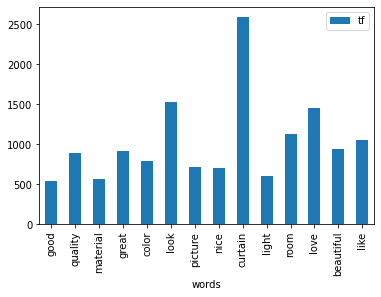

In [155]:
tf[tf["tf"]>500].plot.bar(x="words",y="tf")
plt.show()

In [158]:
text=" ".join(i for i in df.Review)
text

'happy good quality material however panel product fun bedroom windowsbr imagery bit stretched still material lightweight sheer appreciate lo que e que un poco ma great bang buck cant believe quality material vibrant color style work beautifully tie together look different photo exactly looking heavy material great price fast looking picture thought curtain would thinner sheer nice thickness weight help insulate front window look absolutely perfect arrived quickly pleased purchase much thought would wasnt really expecting wanting use curtain picture show rd set ambesonne curtain one set use spring summer one autumn set christmas winter durable color vibrant recommend curtain block view living room front door area dont mess easily seen visitor put christmas light around really brightens everything private closed darkening point dont block light work fine night curtain sheer daytime labeled darkening curtain fault ordering  love curtain printed polyester type material back material white

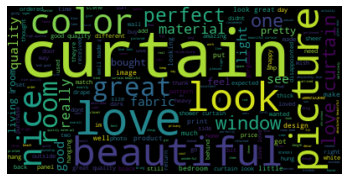

In [160]:
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Sentiment Analysis

In [161]:
df["Review"].head()

0                                                happy
1                  good quality material however panel
2    product fun bedroom windowsbr imagery bit stre...
3                              lo que e que un poco ma
4    great bang buck cant believe quality material ...
Name: Review, dtype: object

In [162]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [164]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores("this one was good for my bathroom")

{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

In [165]:
sia.polarity_scores("this one was not good for my bathroom")

{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.3412}

In [166]:
df["Review"][0:10].apply(lambda x:sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...
2    {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [169]:
df["Review"][0:10].apply(lambda x:sia.polarity_scores(x)["compound"])

0   0.57
1   0.44
2   0.72
3   0.00
4   0.90
5   0.00
6   0.62
7   0.91
8   0.00
9   0.71
Name: Review, dtype: float64

In [171]:
df["Review"][0:10].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

In [172]:
df["sentiment_label"]=df["Review"].apply(lambda x:"pos" if sia.polarity_scores(x)["compound"]>0 else "neg")

In [174]:
df["sentiment_label"].value_counts()

pos    4764
neg     847
Name: sentiment_label, dtype: int64

In [175]:
y=df["sentiment_label"]
X=df["Review"]

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_word_vectorizer=TfidfVectorizer()

In [178]:
X_tf_idf_word=tf_idf_word_vectorizer.fit_transform(X)

In [179]:
#LogisticRegression
log_model=LogisticRegression().fit(X_tf_idf_word,y)

In [180]:
cross_val_score(log_model,X_tf_idf_word,y,scoring="accuracy",cv=5).mean()

0.8944925659084163

In [182]:
new_reniew=pd.Series("this one is shit and bad")
new_reniew=TfidfVectorizer().fit(X).transform(new_reniew)

In [183]:
log_model.predict(new_reniew)

array(['neg'], dtype=object)

#RandomForests


In [184]:
rf_model=RandomForestClassifier().fit(X_tf_idf_word,y)
cross_val_score(rf_model,X_tf_idf_word,y,cv=5,n_jobs=-1).mean()

0.9158810354871326

In [193]:
#hiperparametre Optimizasyonu
rf_model=RandomForestClassifier(random_state=21)
rf_params={"max_depth":[8,None],
           "max_features":[8,"auto"],
           "min_samples_split":[2,5,8,15,20],
           "n_estimators":[100,200,300,500]}

In [194]:
rf_best_grid=GridSearchCV(rf_model,
                          rf_params,
                          cv=5,
                          n_jobs=-1,
                          verbose=1).fit(X_tf_idf_word,y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [195]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 100}

In [202]:
rf_final=rf_model.set_params(**rf_best_grid.best_params_,random_state=21).fit(X_tf_idf_word,y)

In [203]:
cross_val_score(rf_final,X_tf_idf_word,y,cv=5,n_jobs=-1).mean()

0.9178413436126494